<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import keras
from tensorflow import keras 
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer, recall_score

## Load and Prepare Data

In [2]:
data = pd.read_csv('Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## EDA

## Data Preprocessing

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">The names of all countries.</h3>

In [6]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Statistical specifications.</h3>

In [7]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">The percentage of loyal customers from each country.</h3>

In [8]:
(data[data['Exited'] == 1].groupby('Geography')['Exited'].count() / data[data['Exited'] == 0].groupby('Geography')['Exited'].count()) * 100

Geography
France     19.267364
Germany    48.023599
Spain      20.009690
Name: Exited, dtype: float64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Average age breakdown of loyal customers.</h3>

In [9]:
data.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Average age of customers from each country.</h3>

In [10]:
data.groupby('Geography')['Age'].mean()

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Number of male and female customers categorized by loyalty.</h3>

In [11]:
data.groupby('Gender')['Exited'].count()

Gender
Female    4543
Male      5457
Name: Exited, dtype: int64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">The average account balance of non-customers.</h3>

In [12]:
data.groupby('Exited')['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Number of purchases made by customers categorized by loyalty.</h3>

In [13]:
data.groupby('Exited')['NumOfProducts'].count()

Exited
0    7963
1    2037
Name: NumOfProducts, dtype: int64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Percentage of men and women who have credit cards.</h3>

In [14]:
(data[data['HasCrCard'] == 1].groupby('Gender')['HasCrCard'].count() / data.groupby('Gender')['HasCrCard'].count() ) *100

Gender
Female    70.261941
Male      70.789811
Name: HasCrCard, dtype: float64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Percentage of individuals with credit cards categorized by loyalty.</h3>

In [15]:
(data[data['HasCrCard'] == 1].groupby('Exited')['HasCrCard'].count() / data.groupby('Exited')['HasCrCard'].count() ) *100

Exited
0    70.714555
1    69.906726
Name: HasCrCard, dtype: float64

## Storytelling - Visualization

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">A heatmap illustrating the correlation between features.</h3>

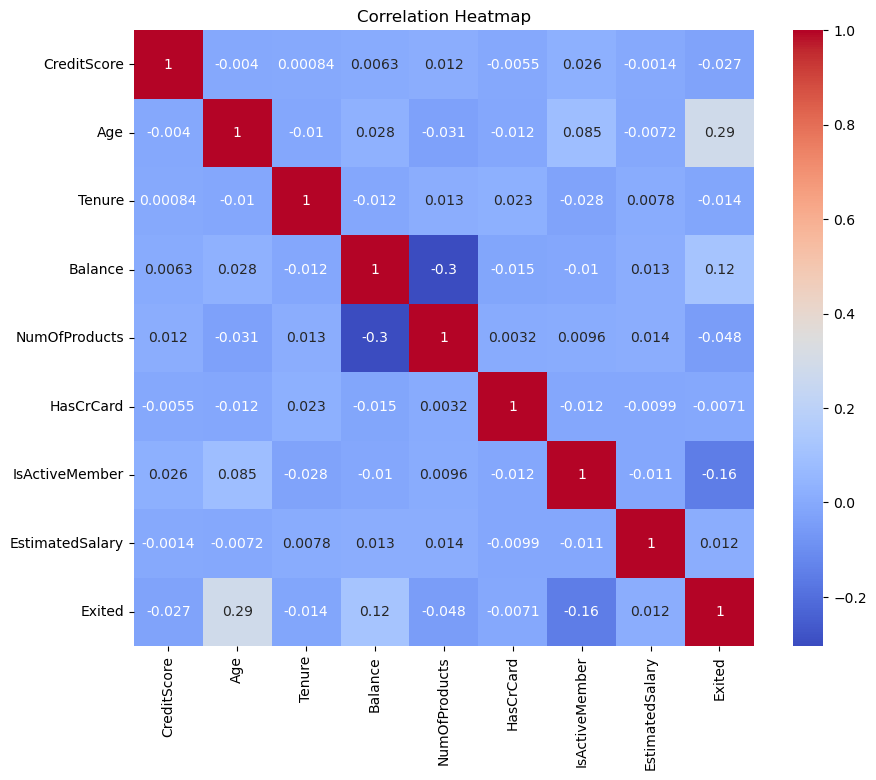

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(['Geography','Gender'],axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">A pie chart showing the distribution of gender.</h3>

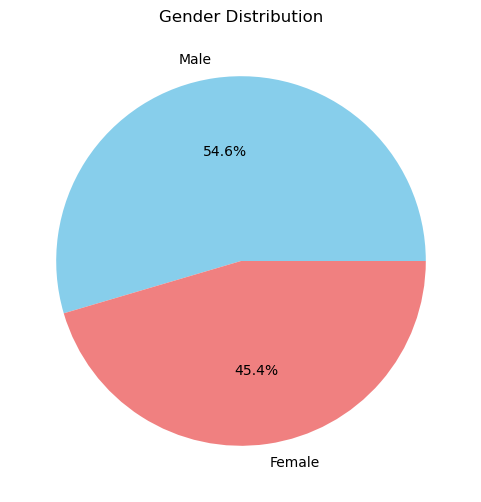

In [17]:
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">A scatter plot illustrating the relationship between age and balance.</h3>

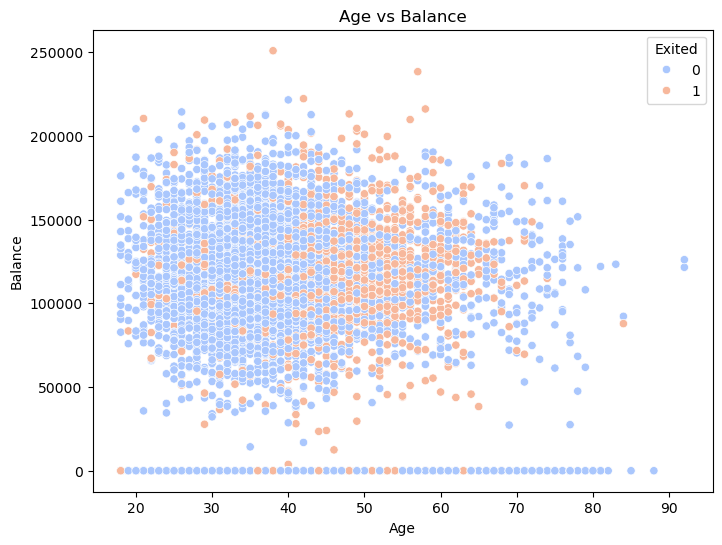

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Balance', data=data, hue='Exited', palette='coolwarm')
plt.title('Age vs Balance')
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">A bar chart for the distribution of the number of financial products.</h3>

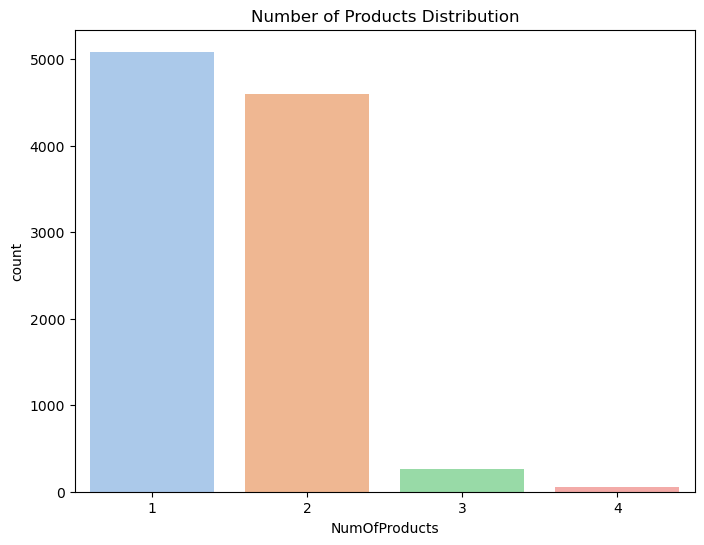

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', data=data, palette='pastel')
plt.title('Number of Products Distribution')
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">A radar chart to visualize multiple features.</h3>

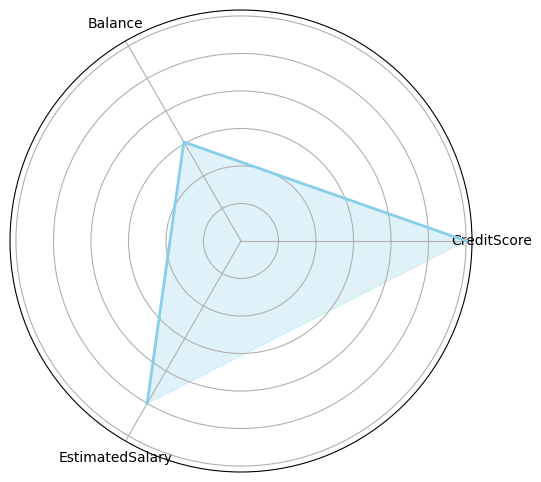

In [20]:

# تبدیل داده به مقیاس مشترک (بین 0 و 1)
scaled_data = data[['CreditScore', 'Balance', 'EstimatedSalary']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# تعیین شکل چندضلعی
num_vars = len(scaled_data.columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# ایجاد نمودار
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, scaled_data.mean().values.tolist(), color='skyblue', alpha=0.25)
ax.plot(angles, scaled_data.mean().values.tolist(), color='skyblue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(scaled_data.columns)
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Defining functions for drawing a chart for each column.</h3>

In [21]:
# Function for distribution plot.
def plot_distribution(column, ax):
    sns.histplot(data[column], kde=True, color='skyblue', ax=ax)
    ax.set_title(f'{column} Distribution')

# Function for box plot.
def plot_boxplot(column, ax):
    sns.boxplot(y=data[column], color='lightcoral', ax=ax)
    ax.set_title(f'{column} Boxplot')

# Function for scatter plot with the "Exited" column.
def plot_scatter_exit(column, ax):
    if column != 'Exited':
        sns.scatterplot(x=column, y='Exited', data=data, hue='Exited', palette='coolwarm', alpha=0.5, ax=ax)
        ax.set_title(f'{column} vs Exited')

# Function for scatter plot with the "Age" column.
def plot_scatter_age(column, ax):
    if column != 'Age':
        sns.scatterplot(x=column, y='Age', data=data, hue='Exited', palette='coolwarm', alpha=0.5, ax=ax)
        ax.set_title(f'{column} vs Age')

# Function for 3D plot.
def plot_3d(column, ax):
    if column in ['CreditScore', 'Balance', 'EstimatedSalary']:
        ax.scatter(data['Age'], data['Exited'], data[column], c='skyblue', marker='o')
        ax.set_xlabel('Age')
        ax.set_ylabel('Exited')
        ax.set_title(f'3D plot of {column}')

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Plotting the distribution of columns.</h3>

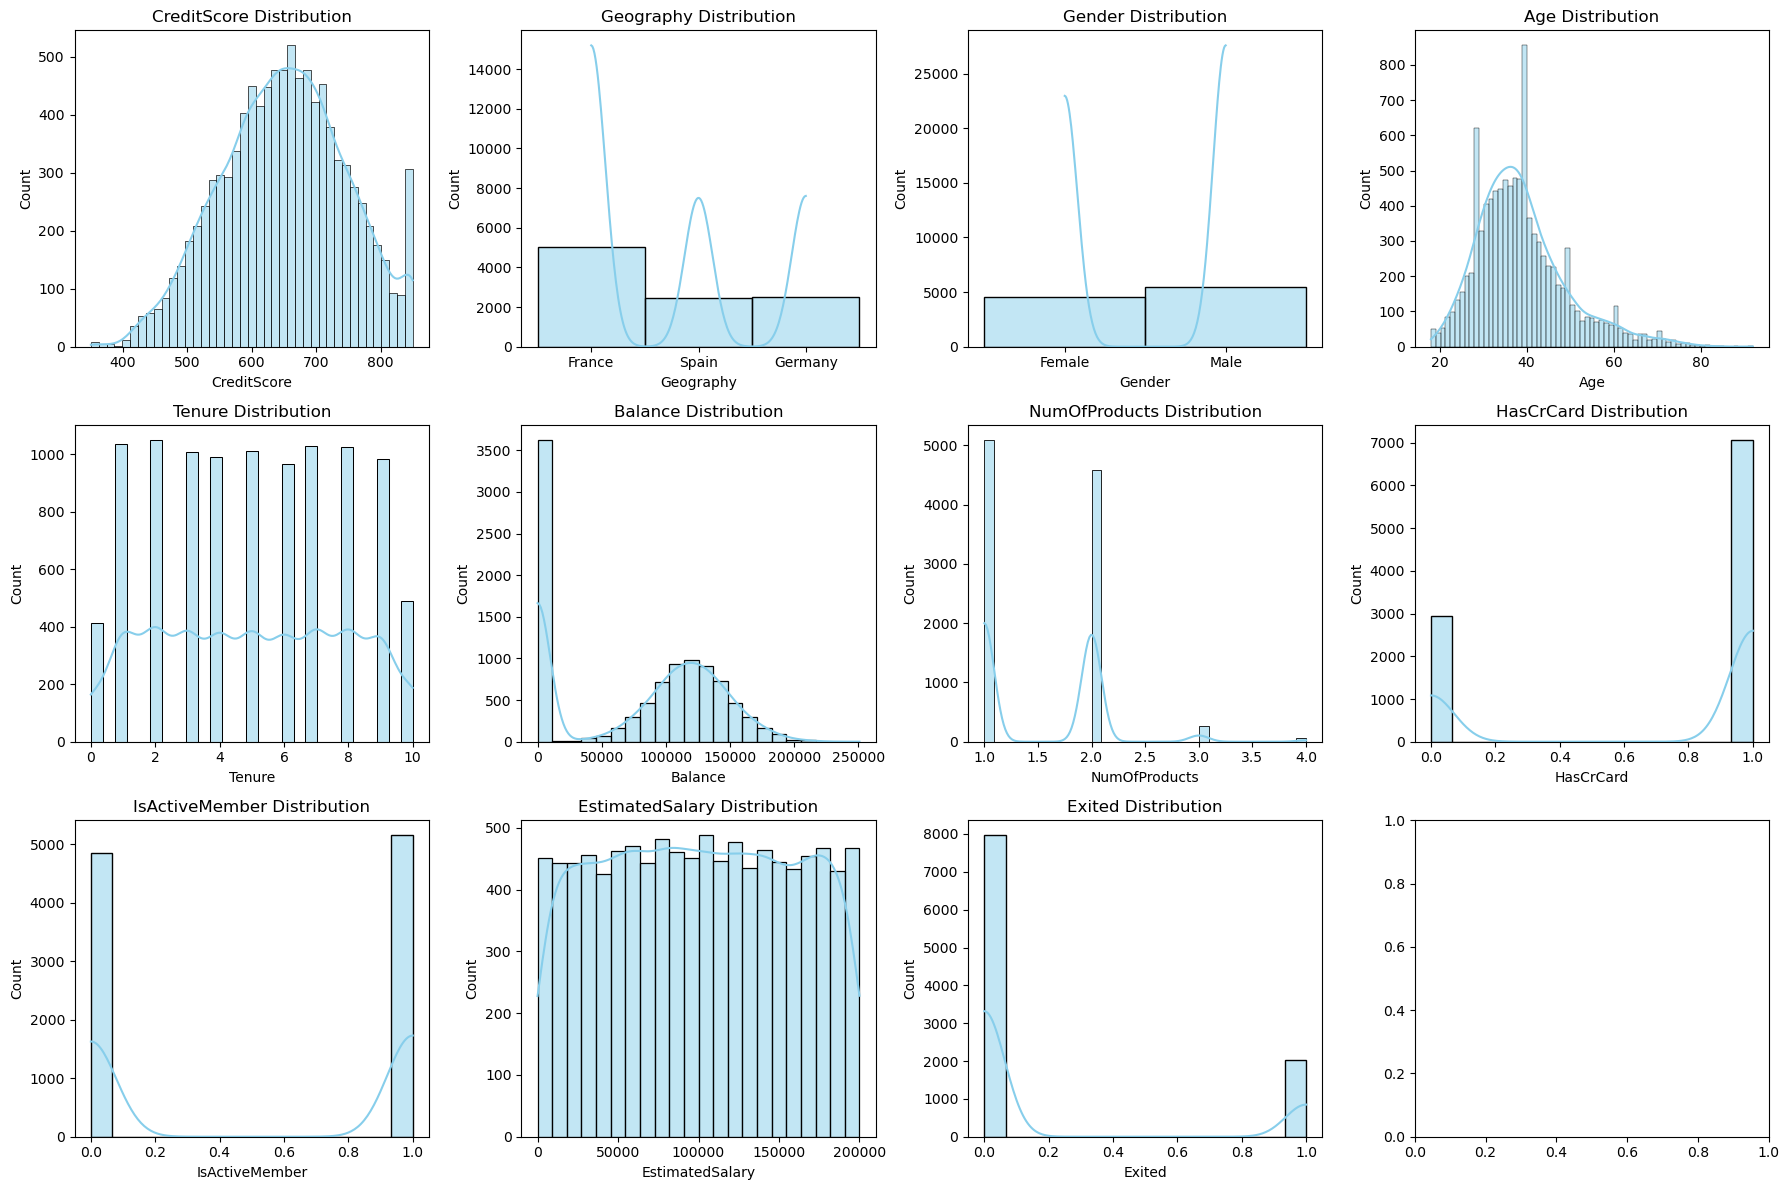

In [22]:
# Creating figures and plots.
fig, axs = plt.subplots(3,4, figsize=(18, 12))

# Calling functions for each column.
for col, ax in zip(data.columns, axs.flatten()):
    plot_distribution(col, ax)

plt.tight_layout()
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Plotting box plots of the columns.</h3>

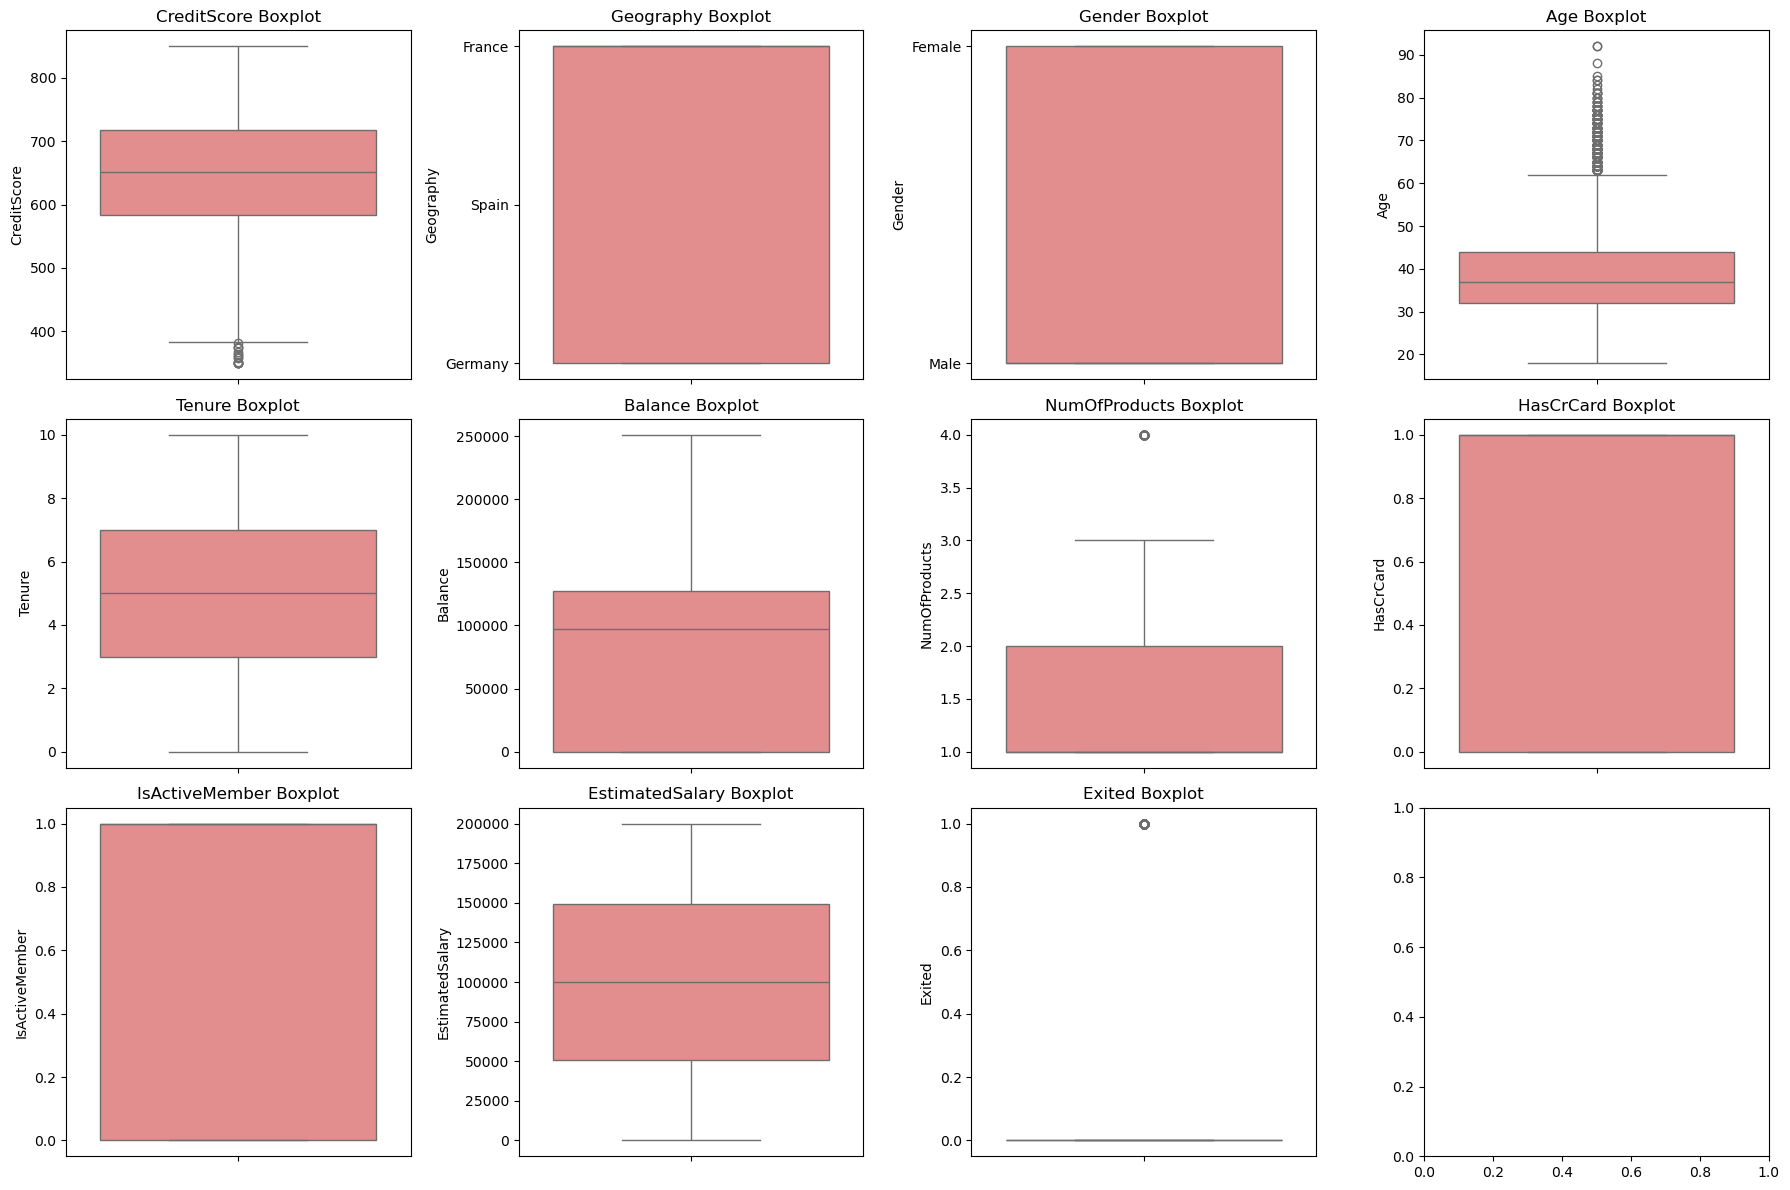

In [23]:
fig, axs = plt.subplots(3,4, figsize=(18, 12))

for col, ax in zip(data.columns, axs.flatten()):
    plot_boxplot(col, ax)

plt.tight_layout()
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Plotting scatter plots for each column, categorized by loyalty.</h3>

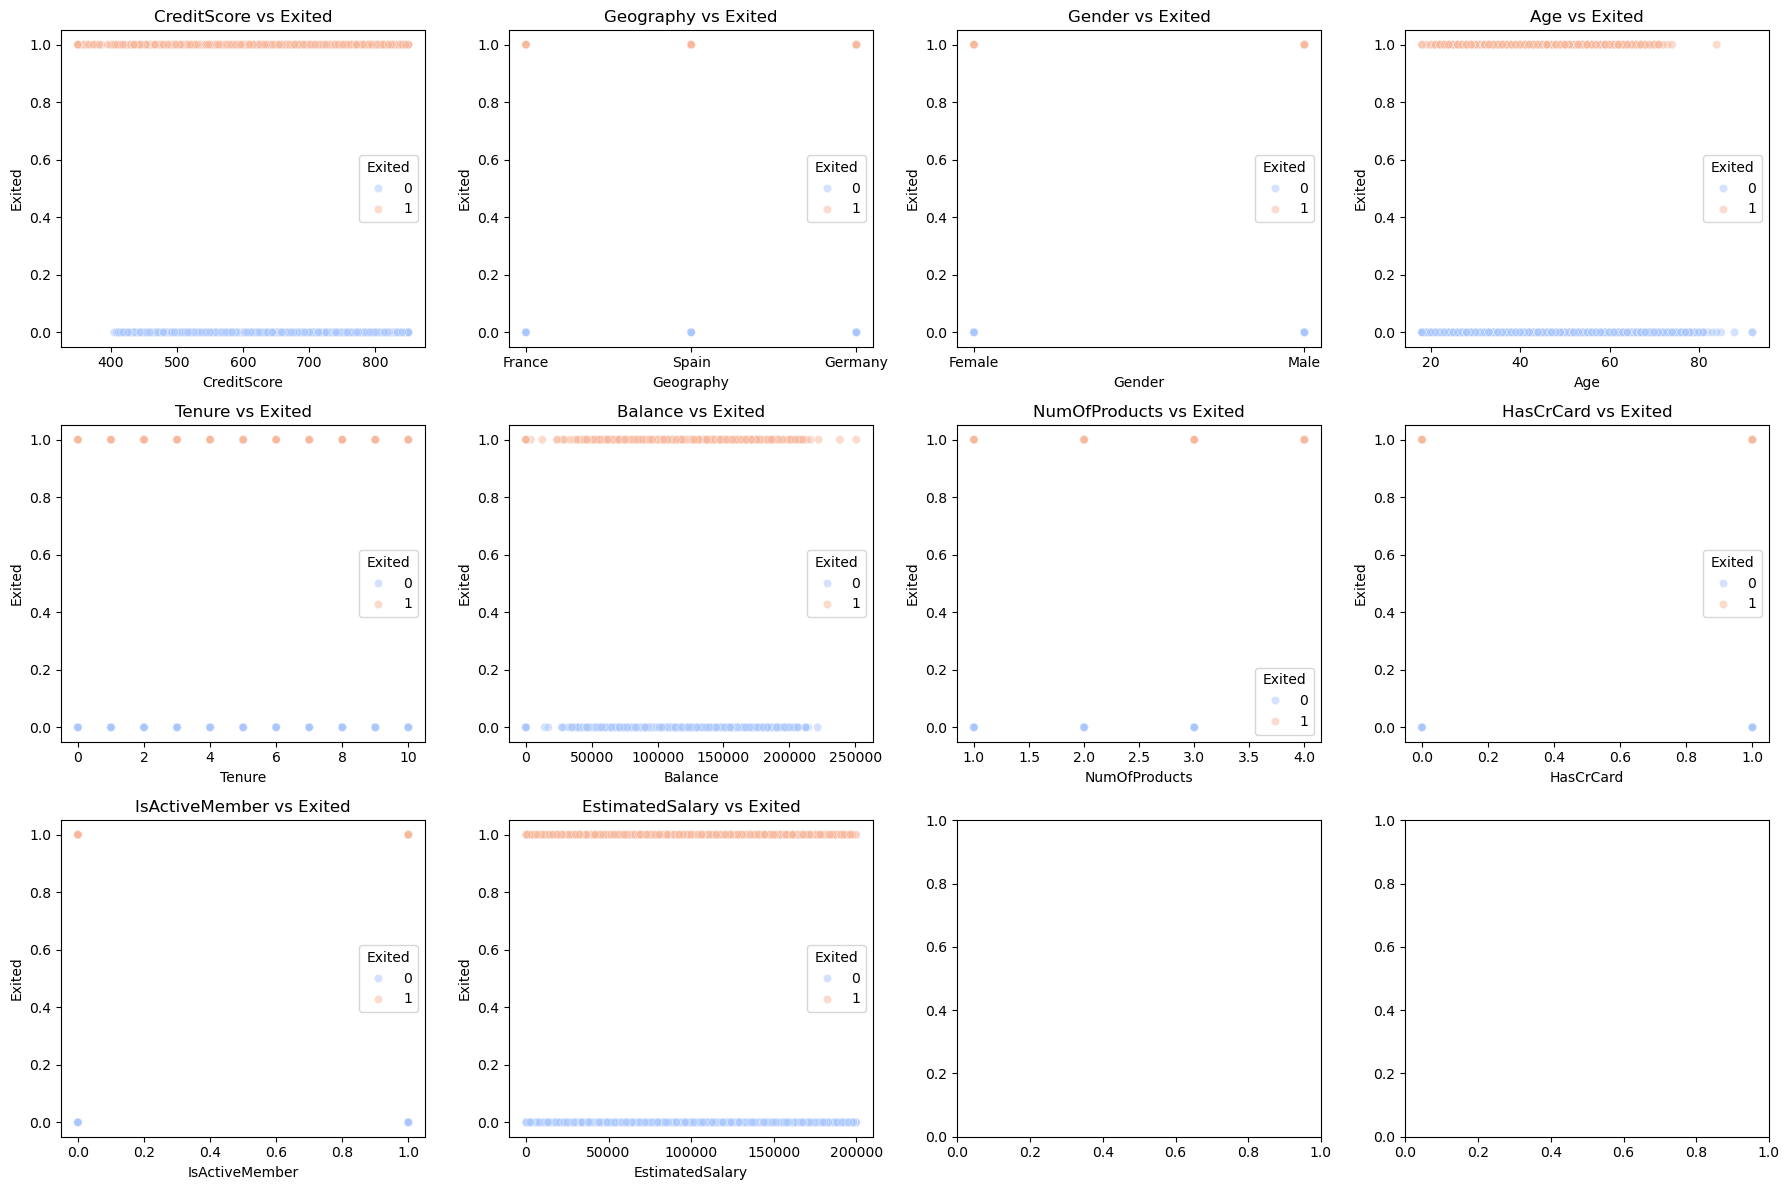

In [24]:
fig, axs = plt.subplots(3,4, figsize=(18, 12))

for col, ax in zip(data.columns, axs.flatten()):
    plot_scatter_exit(col, ax)

plt.tight_layout()
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Plotting scatter plots for each column, categorized by loyalty and age.</h3>

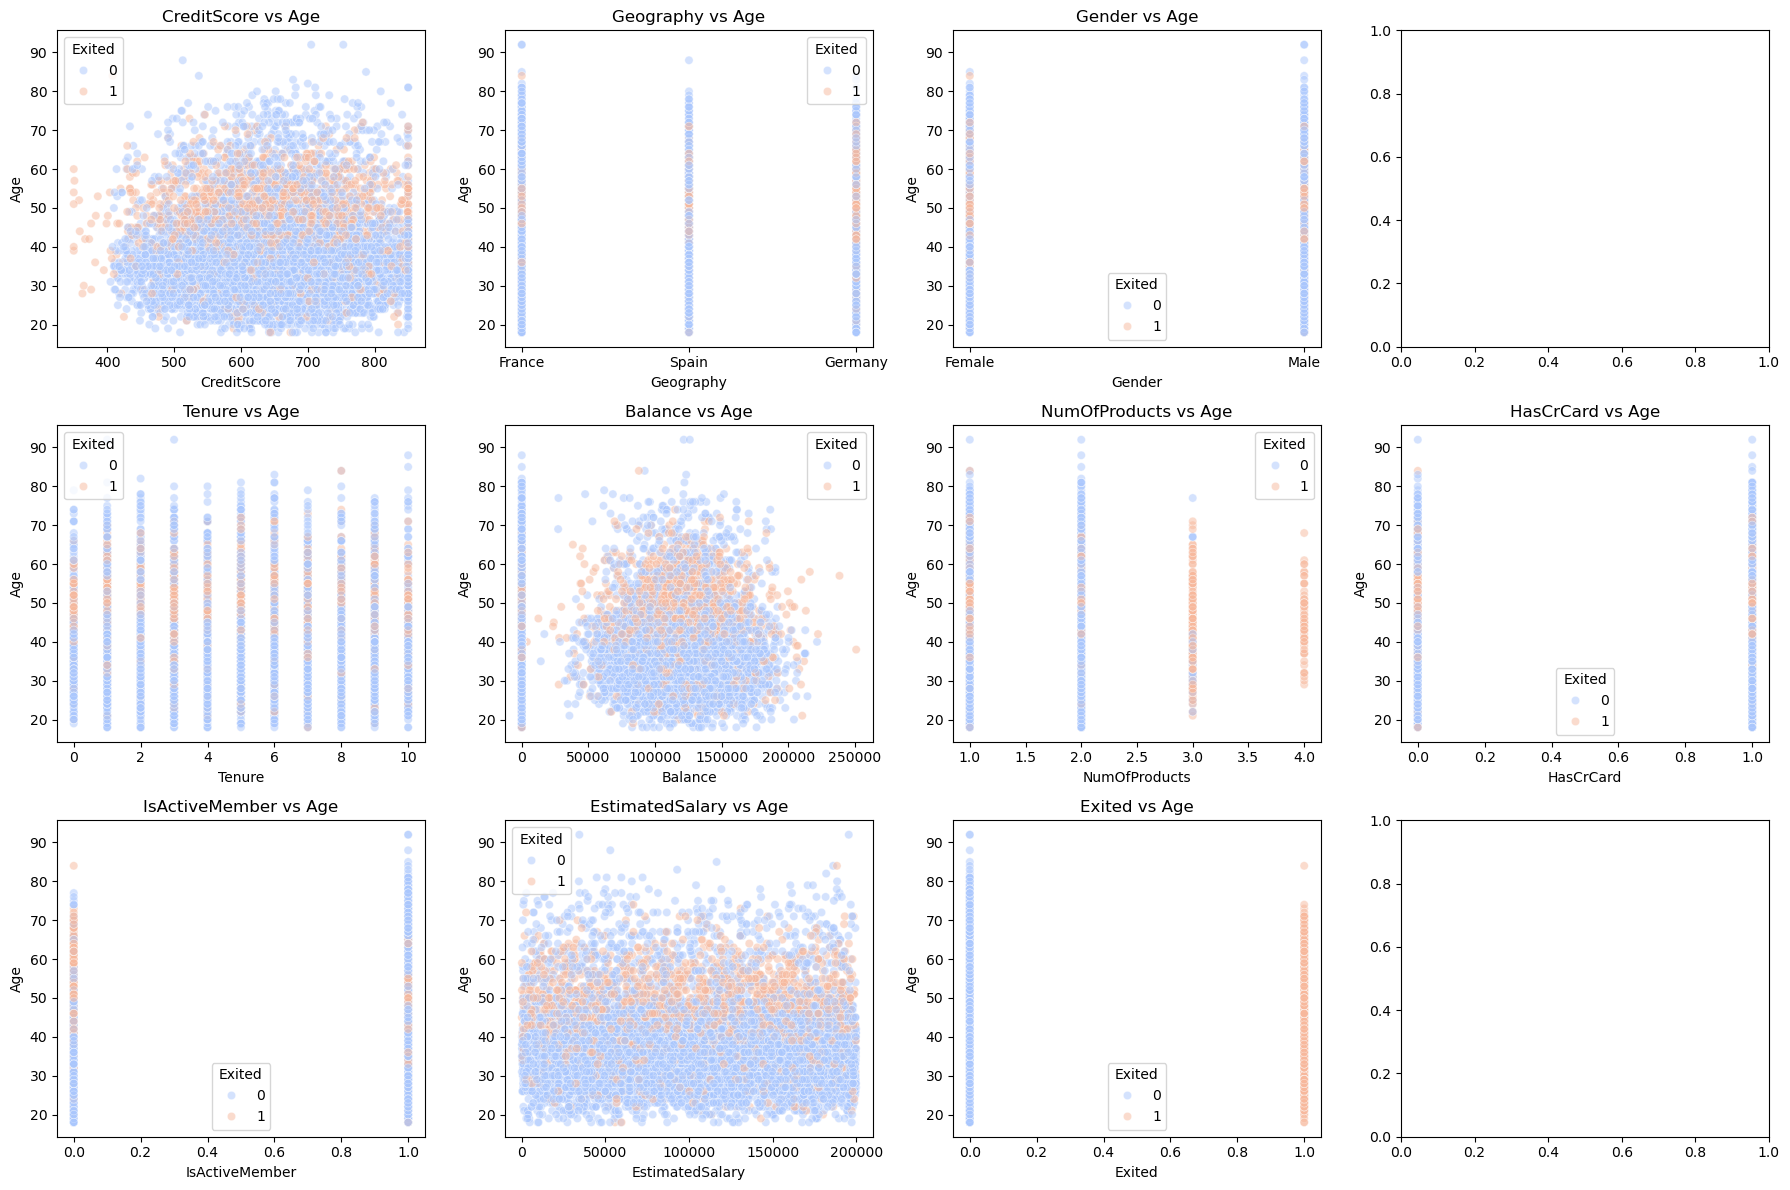

In [25]:
fig, axs = plt.subplots(3,4, figsize=(18, 12))

for col, ax in zip(data.columns, axs.flatten()):
    plot_scatter_age(col, ax)
   
plt.tight_layout()
plt.show()

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Plotting 3D scatter plots for each column, categorized by loyalty.</h3>

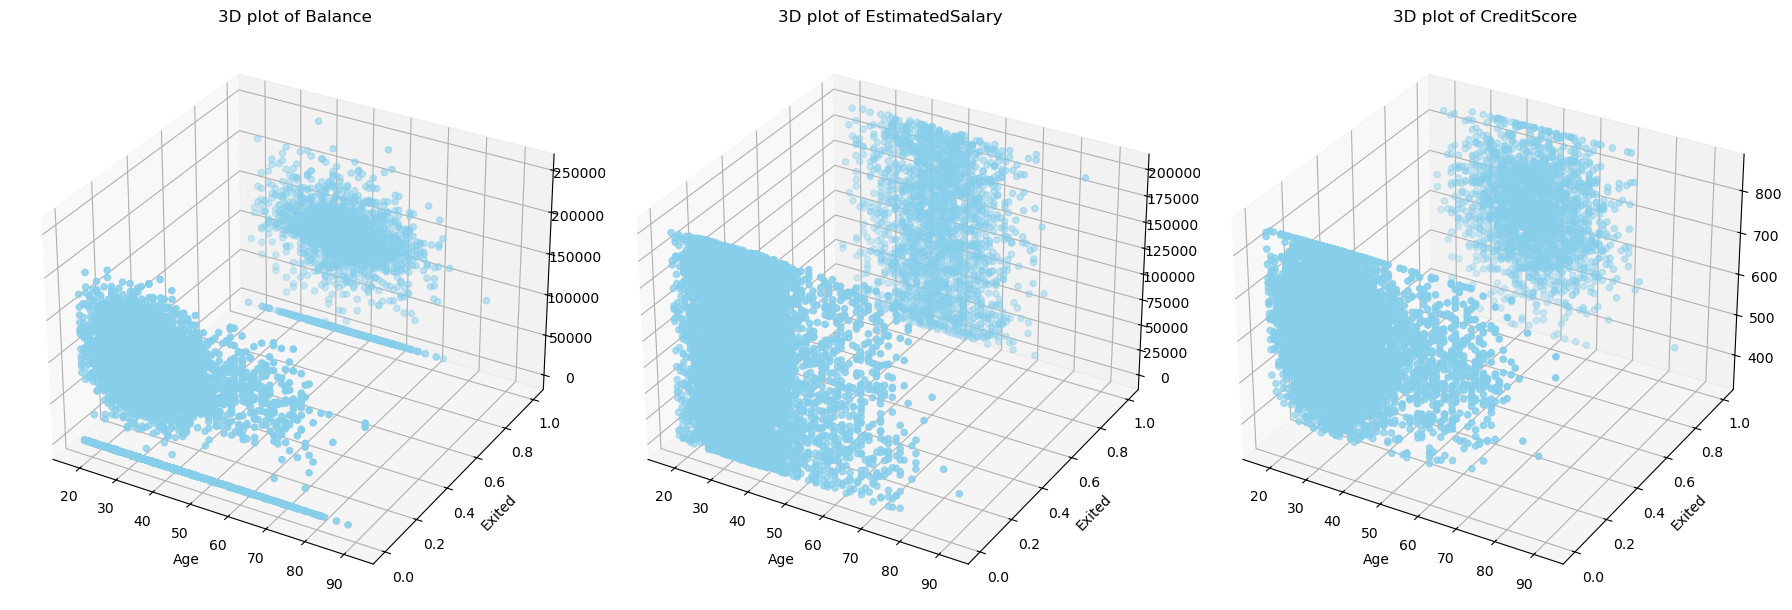

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

plot_3d('Balance', axs[0])
plot_3d('EstimatedSalary', axs[1])
plot_3d('CreditScore', axs[2])

plt.tight_layout()
plt.show()

## Prepare Data for Machine learning

In [27]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Converting non-numeric columns to numeric.</h3>

In [28]:
le_Gender = LabelEncoder()
le_Geography = LabelEncoder()

le_Gender.fit(data['Gender'])
le_Geography.fit(data['Geography'])

LabelEncoder()

In [29]:
models_dir = 'app/Models'
with open(os.path.join(models_dir, 'le_Gender.pkl'), 'wb') as f1, open(os.path.join(models_dir, 'le_Geography.pkl'), 'wb') as f2:
    pickle.dump(le_Gender, f1)
    pickle.dump(le_Geography, f2)


In [30]:
data['Gender'] = le_Gender.transform(data['Gender'])
data['Geography'] = le_Geography.transform(data['Geography'])



In [31]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [32]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Data balancing.</h3>


In [33]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())

Exited
1    7963
0    7963
Name: count, dtype: int64


<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Data normalization.</h3>


In [34]:
sc = StandardScaler()
sc.fit(X_resampled)

StandardScaler()

In [35]:
StandardScaler_path = os.path.join('app','Models','StandardScaler.pkl')
with open(StandardScaler_path,'wb') as f:
    pickle.dump(sc,f)

In [36]:
X_resampled = sc.transform(X_resampled)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=132)

## Train your model

In [38]:
score = make_scorer(recall_score)

#### Decision Tree Classifier

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Hyperparameter tuning.</h3>


In [39]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': range(1,20,1),
    'random_state' : [134]
}

gridSerch = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3,scoring=score)
gridSerch.fit(X_train, y_train)

best_params_dt = gridSerch.best_params_
print("Best parameters found: ", best_params_dt)
print("Best score found: ", gridSerch.best_score_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best parameters found:  {'max_depth': 9, 'random_state': 134}
Best score found:  0.8181816257883323


In [40]:
dtc = DecisionTreeClassifier(**best_params_dt)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, random_state=134)

In [41]:
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test,y_pred_dtc))
print(confusion_matrix(y_test,y_pred_dtc))
dtc_f1Score = f1_score(y_test,y_pred_dtc)
dtc_recallScore = recall_score(y_test,y_pred_dtc)
print('Decision Tree Classifier f1 Score is: ',dtc_f1Score)
print('Decision Tree Classifier recal Score is: ',dtc_recallScore)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1559
           1       0.82      0.81      0.81      1627

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

[[1261  298]
 [ 310 1317]]
Decision Tree Classifier f1 Score is:  0.812461443553362
Decision Tree Classifier recal Score is:  0.8094652735095267


#### K-Nearest Neighbors

<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">جستجو هایپر پارامتر ها</h3>

In [42]:
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1,100,1)
}

gridSerch = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3,scoring=score)
gridSerch.fit(X_train, y_train)

best_params_knn = gridSerch.best_params_
print("Best parameters found: ", best_params_knn)
print("Best score found: ", gridSerch.best_score_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best parameters found:  {'n_neighbors': 1}
Best score found:  0.8412252047236448


In [43]:
knn = KNeighborsClassifier(**best_params_knn)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
knn_f1Score = f1_score(y_test,y_pred_knn)
knn_recallScore = recall_score(y_test,y_pred_knn)
print('K-Nearest Neighbors f1 Score is: ',knn_f1Score)
print('K-Nearest Neighbors recal Score is: ',knn_recallScore)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1559
           1       0.80      0.84      0.82      1627

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

[[1226  333]
 [ 263 1364]]
K-Nearest Neighbors f1 Score is:  0.8206979542719613
K-Nearest Neighbors recal Score is:  0.8383527965580824


#### Random Forest Classifier

<h3 style="text-align: center; margin: 0;background-color: cadetblue; color: white; border-radius: 15px;">Hyperparameter tuning.</h3>

In [45]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators' : [250,300,350,400,500,1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None,15,20,25],
}

gridSerch = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3,scoring=score)
gridSerch.fit(X_train,y_train)

best_params_rfc = gridSerch.best_params_
print("Best parameters found: ", best_params_rfc)
print("Best score found: ", gridSerch.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 1000}
Best score found:  0.8604830457201615


In [46]:
rfc = RandomForestClassifier(**best_params_rfc)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [47]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
rfc_f1Score = f1_score(y_test,y_pred_rfc)
rfc_recallScore = recall_score(y_test,y_pred_rfc)
print('Random Forest Classifier f1 Score is: ',rfc_f1Score)
print('Random Forest Classifier recal Score is: ',rfc_recallScore)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1559
           1       0.86      0.87      0.87      1627

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

[[1332  227]
 [ 213 1414]]
Random Forest Classifier f1 Score is:  0.865361077111383
Random Forest Classifier recal Score is:  0.8690842040565457


#### Support Vector Machines (SVM)

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Hyperparameter tuning.</h3>

In [48]:
model = SVC()

param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10], 'random_state' : [134]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],'random_state' : [134]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4],'random_state' : [134]}
]

gridSerch = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3,scoring=score)
gridSerch.fit(X_train,y_train)

best_params_svc = gridSerch.best_params_
print("Best parameters found: ", best_params_svc)
print("Best score found: ", gridSerch.best_score_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters found:  {'C': 0.1, 'degree': 4, 'kernel': 'poly', 'random_state': 134}
Best score found:  0.8702655867582582


In [49]:
svc = SVC(**best_params_svc)
svc.fit(X_train,y_train)

SVC(C=0.1, degree=4, kernel='poly', random_state=134)

In [50]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))
svc_f1Score = f1_score(y_test,y_pred_svc)
svc_recallScore = recall_score(y_test,y_pred_svc)
print('SVC f1 Score is: ',svc_f1Score)
print('SVC recal Score is: ',svc_recallScore)

              precision    recall  f1-score   support

           0       0.81      0.66      0.73      1559
           1       0.72      0.85      0.78      1627

    accuracy                           0.76      3186
   macro avg       0.77      0.76      0.75      3186
weighted avg       0.76      0.76      0.76      3186

[[1034  525]
 [ 247 1380]]
SVC f1 Score is:  0.7814269535673839
SVC recal Score is:  0.8481868469575906


#### Naive Bayes

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Hyperparameter tuning.</h3>

In [51]:
model = GaussianNB()

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

gridSerch = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3,scoring=score)
gridSerch.fit(X_train,y_train)

best_params_nb = gridSerch.best_params_
print("Best parameters found: ", best_params_nb)
print("Best score found: ", gridSerch.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'var_smoothing': 1e-09}
Best score found:  0.7885097064777076


In [52]:
nb = GaussianNB(**best_params_nb)
nb.fit(X_train,y_train)

GaussianNB()

In [53]:
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
nb_f1Score = f1_score(y_test,y_pred_nb)
nb_recallScore = recall_score(y_test,y_pred_nb)
print('Naive Bayes f1 Score is: ',nb_f1Score)
print('Naive Bayes recal Score is: ',nb_recallScore)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1559
           1       0.80      0.79      0.80      1627

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

[[1238  321]
 [ 340 1287]]
Naive Bayes f1 Score is:  0.7956723338485316
Naive Bayes recal Score is:  0.7910264290104487


#### XGBoost

In [54]:
model = XGBClassifier()

param_grid = {
    'booster' : ['gbtree'],
    'verbosity' : [2],
    'eta' : [0.7,1,1.5],
    'gamma' : [0.1, 0.01, 0.001],
    'max_depth' : [5,10,15]
}

gridSerch = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3,scoring=score)
gridSerch.fit(X_train,y_train)

best_params_xgb = gridSerch.best_params_
print("Best parameters found: ", best_params_xgb)
print("Best score found: ", gridSerch.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'booster': 'gbtree', 'eta': 0.7, 'gamma': 0.001, 'max_depth': 15, 'verbosity': 2}
Best score found:  0.8707418851256975


In [55]:
xgb = XGBClassifier(**best_params_xgb)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.7, eval_metric=None,
              feature_types=None, gamma=0.001, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
y_pred_xgb = nb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
xgb_f1Score = f1_score(y_test,y_pred_xgb)
xgb_recallScore = recall_score(y_test,y_pred_xgb)
print('XGBoost f1 Score is: ',xgb_f1Score)
print('XGBoost recal Score is: ',xgb_f1Score)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1559
           1       0.80      0.79      0.80      1627

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

[[1238  321]
 [ 340 1287]]
XGBoost f1 Score is:  0.7956723338485316
XGBoost recal Score is:  0.7956723338485316


#### CatBoost

In [57]:
catboost = CatBoostClassifier(iterations=50000, learning_rate=0.001, loss_function='Logloss', verbose=10,random_state=134)
catboost.fit(X_train, y_train, eval_set=(X_test, y_test))


y_pred_catboost = catboost.predict(X_test)

print(classification_report(y_test,y_pred_catboost))
print(confusion_matrix(y_test,y_pred_catboost))
ctb_f1Score = f1_score(y_test,y_pred_xgb)
ctb_recallScore = recall_score(y_test,y_pred_catboost)
print('CatBoost f1 Score is: ',ctb_f1Score)
print('CatBoost recal Score is: ',ctb_recallScore)

0:	learn: 0.6924720	test: 0.6924818	best: 0.6924818 (0)	total: 157ms	remaining: 2h 10m 31s
10:	learn: 0.6858542	test: 0.6858677	best: 0.6858677 (10)	total: 276ms	remaining: 20m 54s
20:	learn: 0.6793982	test: 0.6794468	best: 0.6794468 (20)	total: 402ms	remaining: 15m 56s
30:	learn: 0.6731200	test: 0.6731967	best: 0.6731967 (30)	total: 526ms	remaining: 14m 7s
40:	learn: 0.6669737	test: 0.6671030	best: 0.6671030 (40)	total: 652ms	remaining: 13m 14s
50:	learn: 0.6610552	test: 0.6612536	best: 0.6612536 (50)	total: 777ms	remaining: 12m 41s
60:	learn: 0.6551928	test: 0.6554476	best: 0.6554476 (60)	total: 904ms	remaining: 12m 20s
70:	learn: 0.6496674	test: 0.6499911	best: 0.6499911 (70)	total: 1.03s	remaining: 12m 1s
80:	learn: 0.6443092	test: 0.6447068	best: 0.6447068 (80)	total: 1.15s	remaining: 11m 49s
90:	learn: 0.6389688	test: 0.6394161	best: 0.6394161 (90)	total: 1.28s	remaining: 11m 44s
100:	learn: 0.6336838	test: 0.6341824	best: 0.6341824 (100)	total: 1.41s	remaining: 11m 38s
110:	lear

#### Artificial Neural Network

In [58]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dense(240, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 240)                 │           2,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          24,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,841 (104.85 KB)

 Trainable params: 26,841 (104.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Recall()])

checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath='ann_model.keras',monitor='val_accuracy'
                                                      ,save_best_only=True,mode='max',verbose=3)

history = model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=1, validation_split=0.2,callbacks=[checkpoint_callback])

Epoch 1/200
273/319 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.7396 - loss: 0.5238 - recall: 0.7182
Epoch 1: val_accuracy improved from -inf to 0.80495, saving model to ann_model.keras
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7447 - loss: 0.5169 - recall: 0.7249 - val_accuracy: 0.8049 - val_loss: 0.4260 - val_recall: 0.7792
Epoch 2/200
295/319 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8012 - loss: 0.4329 - recall: 0.7956
Epoch 2: val_accuracy improved from 0.80495 to 0.81554, saving model to ann_model.keras
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4322 - recall: 0.7957 - val_accuracy: 0.8155 - val_loss: 0.4103 - val_recall: 0.8000
Epoch 3/200
298/319 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.8132 - loss: 0.4123 - recall: 0.7988
Epoch 3: val_accuracy improved from 0.81554 to 0.81593, saving model to ann_model.keras
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8135 - loss: 0.4120 - recall: 0.7994 - val_accuracy: 0.8

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loaded_model = keras.models.load_model('ann_model.keras')
y_pred_AN = loaded_model.predict(X_test).round().flatten()

y_pred_AN
print(classification_report(y_test,y_pred_AN))
print(confusion_matrix(y_test,y_pred_AN))
ann_f1Score = f1_score(y_test,y_pred_AN)
ann_recallScore = recall_score(y_test,y_pred_AN)
print('artificial neural network f1 Score is: ',ann_f1Score)
print('artificial neural network recal Score is: ',ann_f1Score)

## Test the model and show the metrics

In [ ]:
compare_result = {
    'f1_score' : [dtc_f1Score,nb_f1Score,knn_f1Score,rfc_f1Score,svc_f1Score,xgb_f1Score,ctb_f1Score,ann_f1Score],
    'recal_score' : [dtc_recallScore,nb_recallScore,knn_recallScore,rfc_recallScore,svc_recallScore,xgb_recallScore,ctb_recallScore,ann_recallScore]
}
compare_result_df = pd.DataFrame(compare_result,index=['Decision Tree Classifier','Naive Bayes','K-Nearest Neighbors',
                                                       'Random Forest Classifier','SVC','XGBoost','CatBoost','Artificial Neural Network'])

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

bar_width = 0.35

x_f1 = np.arange(len(compare_result_df.index))

f1_feature = ax.barh(x_f1 - bar_width/2, compare_result_df['f1_score'], bar_width, color='purple', label='F1 Score')

x_recall = np.arange(len(compare_result_df.index))

recall_feature = ax.barh(x_recall + bar_width/2, compare_result_df['recal_score'], bar_width, color='blue', label='Recall Score')

ax.set_xlabel('Score')
ax.set_ylabel('Classifier')
ax.set_title('Comparison of F1 Score and Recall Score between Classifiers')

plt.axvline(x=compare_result_df['recal_score'].max(), color='blue', linestyle='--')
plt.axvline(x=compare_result_df['f1_score'].max(), color='purple', linestyle='--')

ax.set_yticks(np.arange(len(compare_result_df.index)))
ax.set_yticklabels(compare_result_df.index)

plt.legend()
plt.show()

## Save your final model

<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">Random Forest Classifier is best model</h3>

In [ ]:
rfc_model_path = os.path.join('app','Models','rfc_mode.pkl')
with open(rfc_model_path,'wb') as f:
    pickle.dump(rfc,f)